In [84]:
#Import the libraries
import os
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_boston,load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set(color_codes=True)

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

#Load the data
boston = load_boston()


#Find the dic keys
print(boston.keys())
tf.__version__

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


'2.1.0'

In [85]:
#find features name
columns = boston.feature_names
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [86]:
#Create dataframe
boston_data = pd.DataFrame(boston.data)
boston_data.columns = columns
print(boston_data.shape)
boston_data['TARGET'] = boston.target
boston_data

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


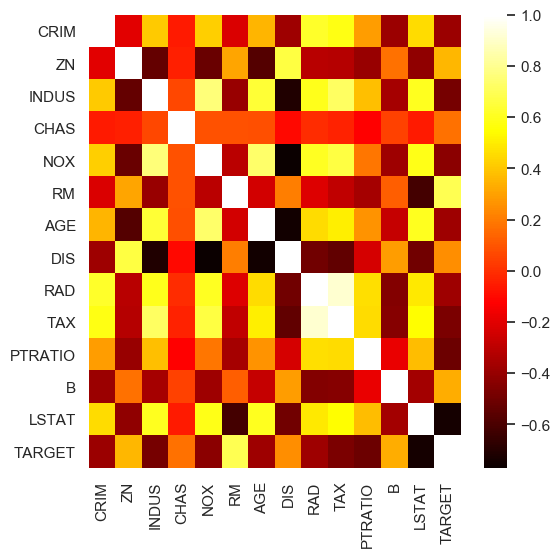

In [87]:
plt.figure(figsize= (6,6), dpi=100)
sns.heatmap(boston_data.corr(),cmap='hot')

In [14]:
# # Just to search for nice variables with good correlation and outliers.
# def corrdot(*args, **kwargs):
#     corr_r = args[0].corr(args[1], 'pearson')
#     corr_text = f"{corr_r:2.2f}".replace("0.", ".")
#     ax = plt.gca()
#     ax.set_axis_off()
#     marker_size = abs(corr_r) * 10000
#     ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
#                vmin=-1, vmax=1, transform=ax.transAxes)
#     font_size = abs(corr_r) * 40 + 5
#     ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
#                 ha='center', va='center', fontsize=font_size)

# g = sns.PairGrid(boston_data[['INDUS','AGE','RAD','TAX','LSTAT','TARGET']], aspect=1.4, diag_sharey=False)
# g.map_lower(sns.regplot, lowess=True, ci=True, line_kws={'color': 'black'})
# g.map_diag(sns.distplot, kde_kws={'color': 'black'})
# g.map_upper(corrdot)

In [88]:
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [150]:
x='INDUS'
y='TAX'
boston_df = boston_data[[x,y]].drop_duplicates()
boston_df

,INDUS,TAX
0,2.31,296.0
1,7.07,242.0
3,2.18,222.0
6,7.87,311.0
13,8.14,307.0
...,...,...
354,1.91,334.0
356,18.10,666.0
488,27.74,711.0
493,9.69,391.0


In [151]:
# # Another test dataset
# a= [[ 12,   7,   9],
#  [  9,  16,   7],
#  [ 14,  11,  10],
#  [ 14,   5,   5],
#  [ 12,   8,   7],
#  [  8,   8,  10],
#  [  9,  14,   8],
#  [ 12,  12,  10],
#  [ 18,  10,   6],
#  [  6,  12,  11],
#  [  4,  12,  15],
#  [  5,  13,  10],
#  [  8,   9,   8],
#  [106, 116,  97],
#  [ 90, 116, 114]]
# z='THIRD'
# boston_df = pd.DataFrame(a,columns=[x,y,z])
# boston_df

In [152]:
boston_df.corr()

,INDUS,TAX
INDUS,1.000000,0.426369
TAX,0.426369,1.000000


Text(0, 0.5, 'TAX')

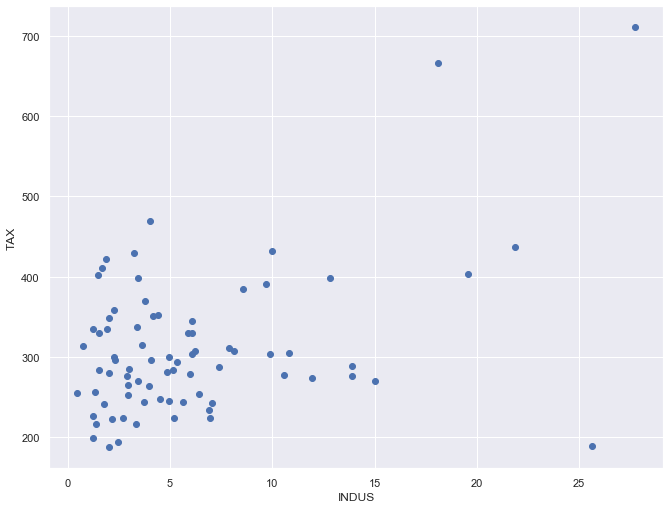

In [153]:
#Multivariate outlier analysis
fig, ax = plt.subplots(figsize=(11,8.5))
ax.scatter(boston_df[x], boston_df[y])
ax.set_xlabel(x)
ax.set_ylabel(y)

In [154]:
scaler = preprocessing.MinMaxScaler()
x_train = scaler.fit_transform(boston_df)
x_train.shape

(77, 2)

In [155]:
# Train model for 100 epochs, batch size of 10: 
EPOCHS=100
BATCH_SIZE=100
act_func = 'relu'

# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X. 
model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(x_train.shape[1],)))

model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(x_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')


In [156]:
history=model.fit(x_train,x_train,
                  batch_size=BATCH_SIZE, 
                  epochs=EPOCHS,
                  validation_split=0.05)
                #   metrics=['mae','rmse'])

Train on 73 samples, validate on 4 samples
Epoch 1/100
73/73 [==============================] - 0s 5ms/sample - loss: 0.0626 - val_loss: 0.4589
Epoch 2/100
73/73 [==============================] - 0s 164us/sample - loss: 0.0621 - val_loss: 0.4573
Epoch 3/100
73/73 [==============================] - 0s 164us/sample - loss: 0.0617 - val_loss: 0.4557
Epoch 4/100
73/73 [==============================] - 0s 165us/sample - loss: 0.0612 - val_loss: 0.4542
Epoch 5/100
73/73 [==============================] - 0s 192us/sample - loss: 0.0607 - val_loss: 0.4526
Epoch 6/100
73/73 [==============================] - 0s 164us/sample - loss: 0.0603 - val_loss: 0.4511
Epoch 7/100
73/73 [==============================] - 0s 151us/sample - loss: 0.0598 - val_loss: 0.4497
Epoch 8/100
73/73 [==============================] - 0s 151us/sample - loss: 0.0593 - val_loss: 0.4482
Epoch 9/100
73/73 [==============================] - 0s 123us/sample - loss: 0.0588 - val_loss: 0.4467
Epoch 10/100
73/73 [============

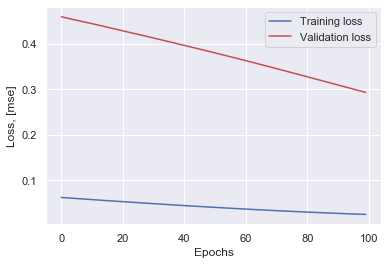

In [157]:
plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.show()

0.28380036230541844

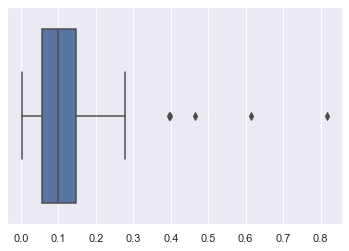

In [164]:
X_pred = model.predict(x_train)
mae = np.mean(np.abs(X_pred-x_train), axis = 1)

IQR = stats.iqr(mae)
Q3 = np.quantile(mae,0.75)
threshold = Q3 + 1.5 * IQR

# x_train[mae>threshold]
# sns.scatterplot(mae,0)
sns.boxplot(mae)
threshold

Text(0, 0.5, 'Frequency')

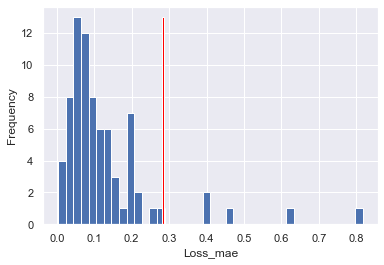

In [166]:
plt.figure()
plt.hist(mae,bins=40)
plt.bar(threshold,max(np.histogram(mae,bins=40)[0]),width=0.005,color='red',label='Threshold')
plt.xlabel('Loss_mae')
plt.ylabel('Frequency')
# plt.xlim([0.0,.5])

In [167]:
x_train[mae>threshold]

array([[0.9233871 , 0.0019084 ],
       [0.78555718, 0.47709924],
       [0.70087977, 0.41221374],
       [0.64662757, 0.91412214],
       [1.        , 1.        ]])

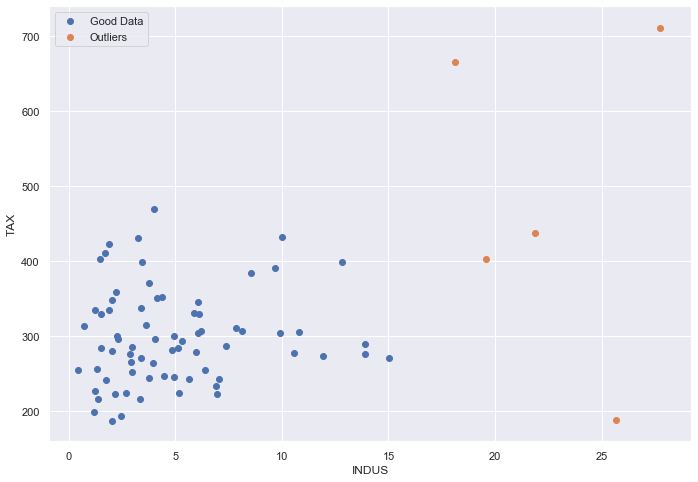

In [168]:
# Visualize outliers results
plt.figure(figsize=(11.5,8))
plt.scatter(boston_df[x][mae<=threshold], boston_df[y][mae<=threshold],label='Good Data')
plt.scatter(boston_df[x][mae>threshold], boston_df[y][mae>threshold], label= 'Outliers')
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.show()